In [1]:
from collections import Counter
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../data/final_data.csv')

In [3]:
df.isna().sum() / len(df) * 100

short_descriptions    1.620004
assignment_groups     1.614584
dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
df.tail()

,short_descriptions,assignment_groups
166044,Data files per our call,PZC-FJ-ServiceDesk
166045,Approver Matrix,PZC-FJ-ServiceDesk
166046,a new Product Hierarchy Level 5 and 6: Vegeta...,PZC-FJ-ServiceDesk
166047,[SAP] Create SAP account in PROD for Charala...,PZC-FJ-ServiceDesk
166048,APO Daily and Monthly Chains to be triggere...,PZC-FJ-ServiceDesk


In [6]:
X, y = df['short_descriptions'], df['assignment_groups']

In [7]:
cnt_asgn_grps = df['assignment_groups'].value_counts()

<AxesSubplot:>

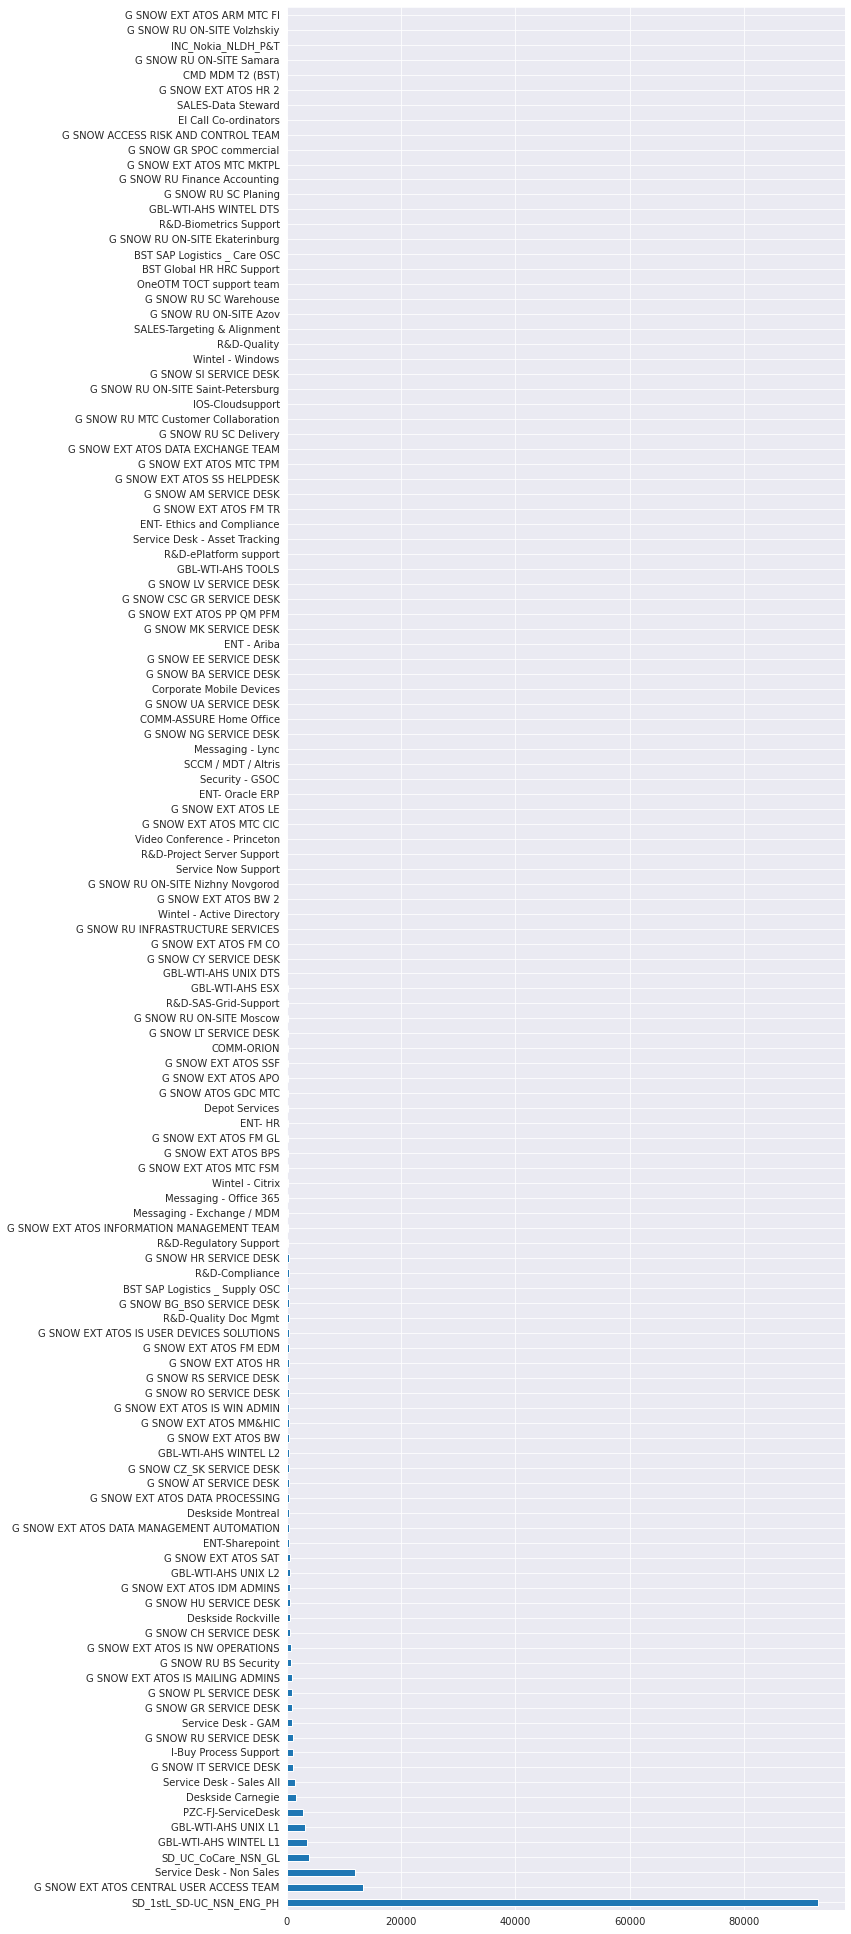

In [8]:
cnt_asgn_grps[:127].plot(kind='barh', figsize=(10, 35))

In [9]:
wanted = cnt_asgn_grps[cnt_asgn_grps > 10]

In [10]:
new_df = df[df['assignment_groups'].isin(wanted.index.to_list())]

In [11]:
X, y = new_df['short_descriptions'], new_df['assignment_groups']

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
over_sampler = SMOTE()

In [14]:
vectorizer = joblib.load('../models/vectorizer')
encoder = joblib.load('../models/encoder')

In [15]:
X_vec = vectorizer.transform(X)
y_enc = encoder.transform(y)

In [16]:
%%time

X, y = over_sampler.fit_resample(X_vec, y_enc)

CPU times: user 18.5 s, sys: 5.1 s, total: 23.6 s
Wall time: 23.6 s


In [17]:
%%time

X = vectorizer.inverse_transform(X)
y = encoder.inverse_transform(y)

CPU times: user 37min 48s, sys: 30.1 s, total: 38min 18s
Wall time: 38min 18s


In [18]:
len(X), len(y)

(14866400, 14866400)

In [19]:
res_df = pd.DataFrame(
    {
        'short_descriptions': X,
        'assignment_groups': y
    }
)

In [20]:
res_df.shape

(14866400, 2)

In [35]:
res_df.tail()

,short_descriptions,assignment_groups
14866395,"[access, for, need, ngit, reporting]",grp_Atos_NGIT_Reporting
14866396,[for],grp_Atos_NGIT_Reporting
14866397,[reporting],grp_Atos_NGIT_Reporting
14866398,"[app, ngit, reporting]",grp_Atos_NGIT_Reporting
14866399,[],grp_Atos_NGIT_Reporting


In [21]:
def clean_text(text):
    return ' '.join([t for t in text])

In [22]:
res_df['short_descriptions'] = res_df['short_descriptions'].apply(lambda x:clean_text(x))

In [24]:
res_df.tail()

,short_descriptions,assignment_groups
14866395,bi power,grp_Atos_NGIT_Reporting
14866396,data for,grp_Atos_NGIT_Reporting
14866397,ngit,grp_Atos_NGIT_Reporting
14866398,for,grp_Atos_NGIT_Reporting
14866399,for,grp_Atos_NGIT_Reporting


<AxesSubplot:>

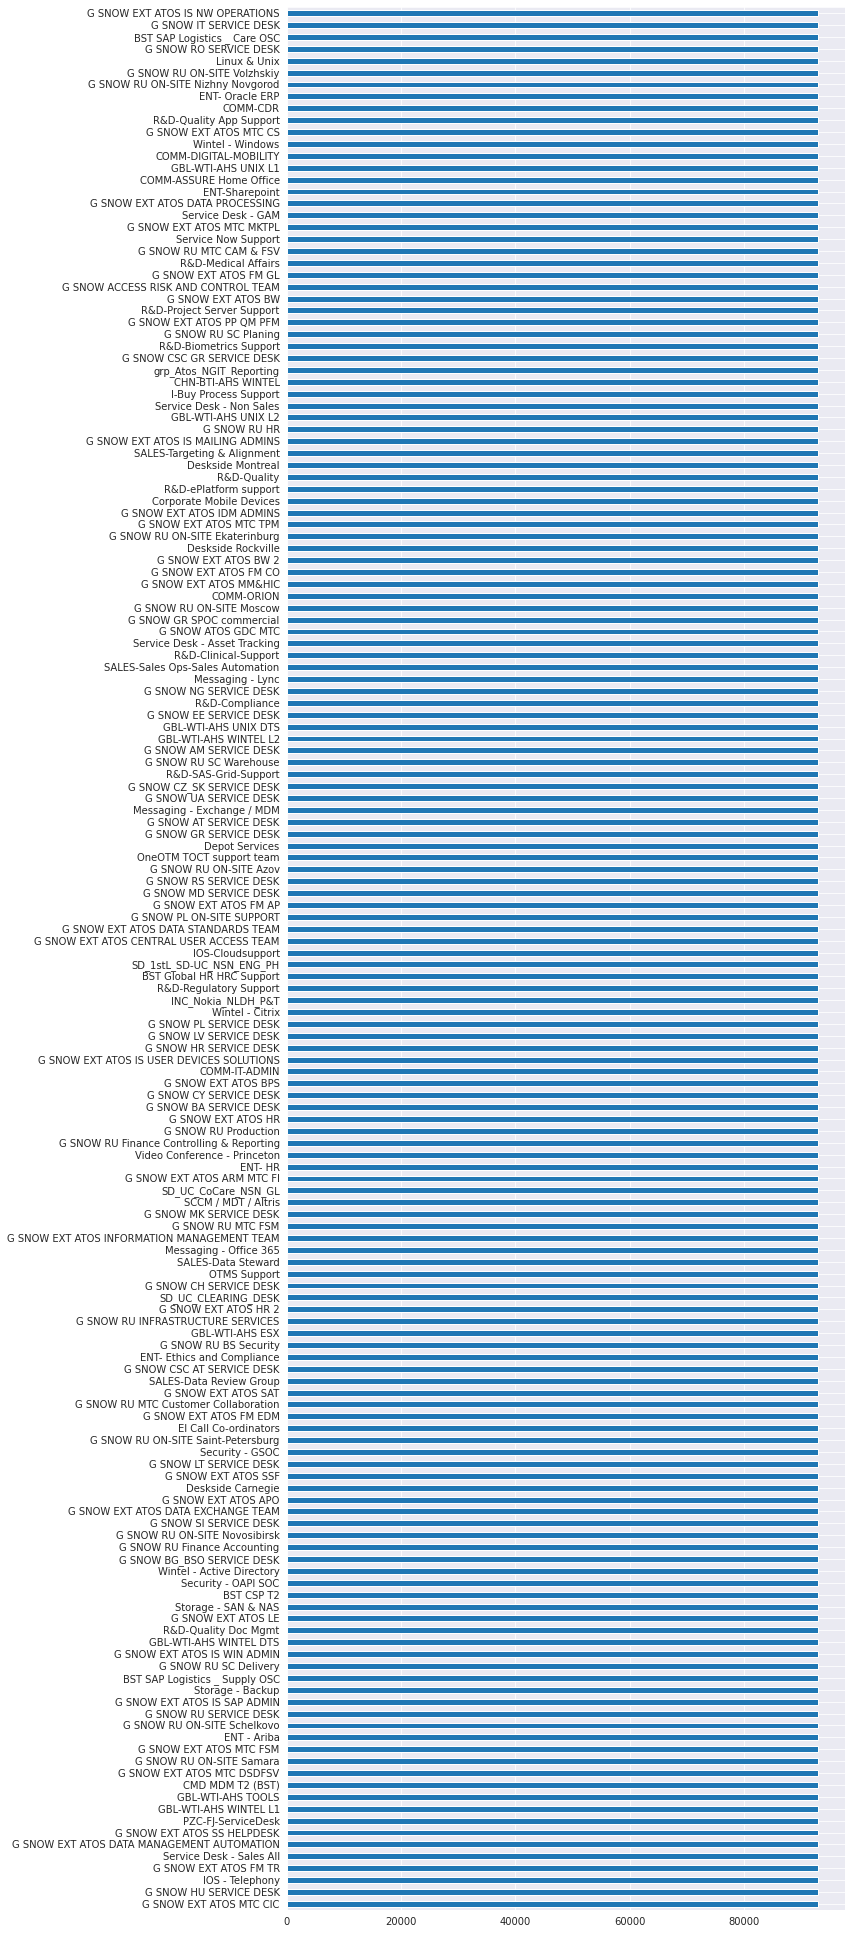

In [28]:
res_df['assignment_groups'].value_counts().plot(kind='barh', figsize=(10, 35))

In [29]:
res_df.to_csv('../data/balanced_data.csv', index=False)